In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/drive/My Drive/DataSet/SuicideData.csv')

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df_copy = df.copy()

In [6]:
df_copy = df_copy.rename(columns={"gdp_per_capita ($)": "gdp_per_capita", 
                                  "suicides/100k pop": "suicides", 
                                  "gdp_per_capita ($)}" : "gdp_per_capita", 
                                  "HDI for year" : "HDI_for_year"})

In [7]:
df_copy.shape

(27820, 12)

In [8]:
df_copy.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides               5298
country-year           2321
HDI_for_year            305
 gdp_for_year ($)      2321
gdp_per_capita         2233
generation                6
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


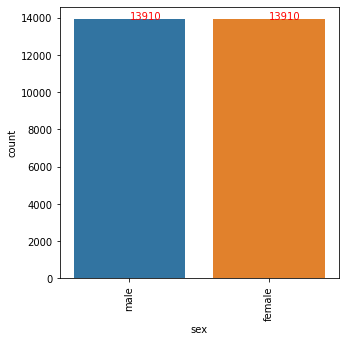

In [9]:

fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
s = df_copy['sex'].value_counts()
ax = sns.countplot(df_copy['sex'])
plt.xticks(rotation=90)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.sex + 0.2 , v.sex, color='red')

In [10]:
print('Sucide count of Male :', (df_copy['sex'] == 'male').sum())
print('Sucide count of Female :', (df_copy['sex'] == 'female').sum())

Sucide count of Male : 13910
Sucide count of Female : 13910


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

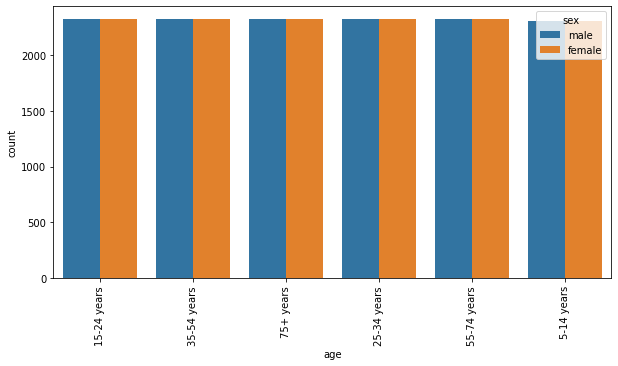

In [11]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
s = df_copy['age'].value_counts()
sns.countplot(x="age", hue="sex", data=df_copy)
plt.xticks(rotation=90)

In [12]:
df_suicide_country = df_copy.groupby(['country'])['suicides_no'].sum()
df_suicide_country = df_suicide_country.to_frame().reset_index()

In [13]:

df_suicide_country = df_suicide_country.sort_values('suicides_no', ascending=False)

In [14]:
df_suicide_countryTop = df_suicide_country[df_suicide_country['suicides_no'] > 100000]
df_suicide_countryTop

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
35,Germany,291262
73,Republic of Korea,261730
15,Brazil,226613
69,Poland,139098
97,United Kingdom,136805


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

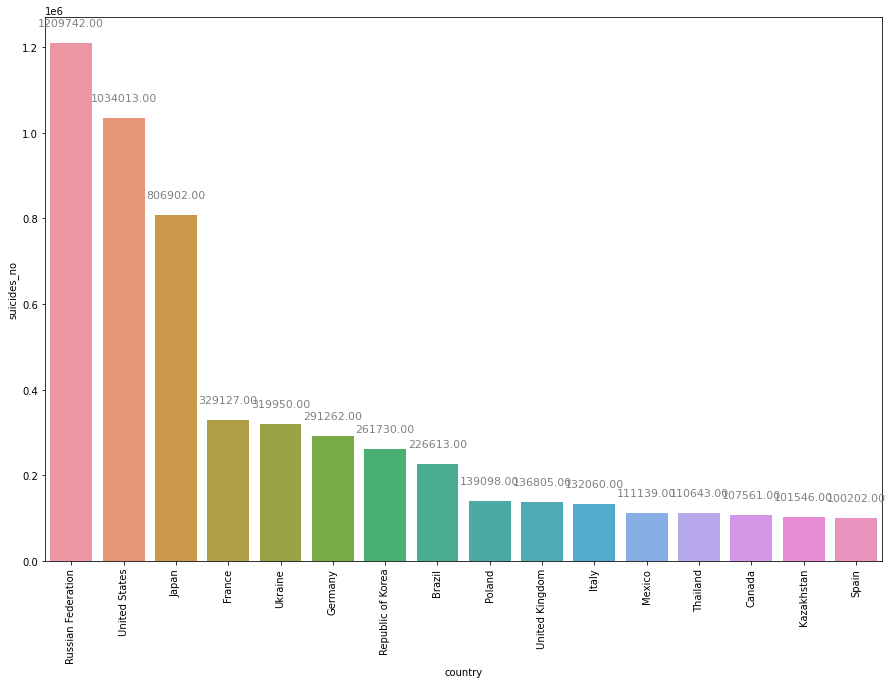

In [15]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="country", y="suicides_no", data=df_suicide_countryTop)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.xticks(rotation=90)

In [16]:
agedistf = pd.DataFrame(df_copy.groupby('sex').get_group('female').groupby('age').suicides_no.sum())
agedistm = pd.DataFrame(df_copy.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

Text(0.5, 0, 'Suicides per 100K')

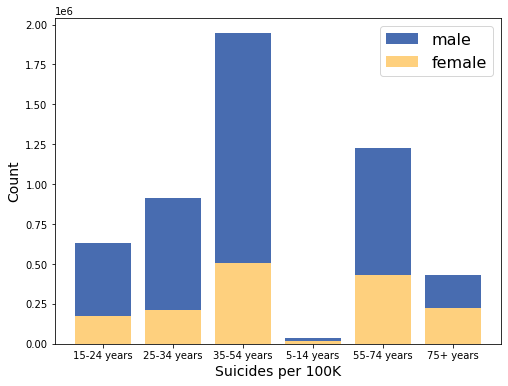

In [17]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))
plt.figure(figsize=(8, 6))

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

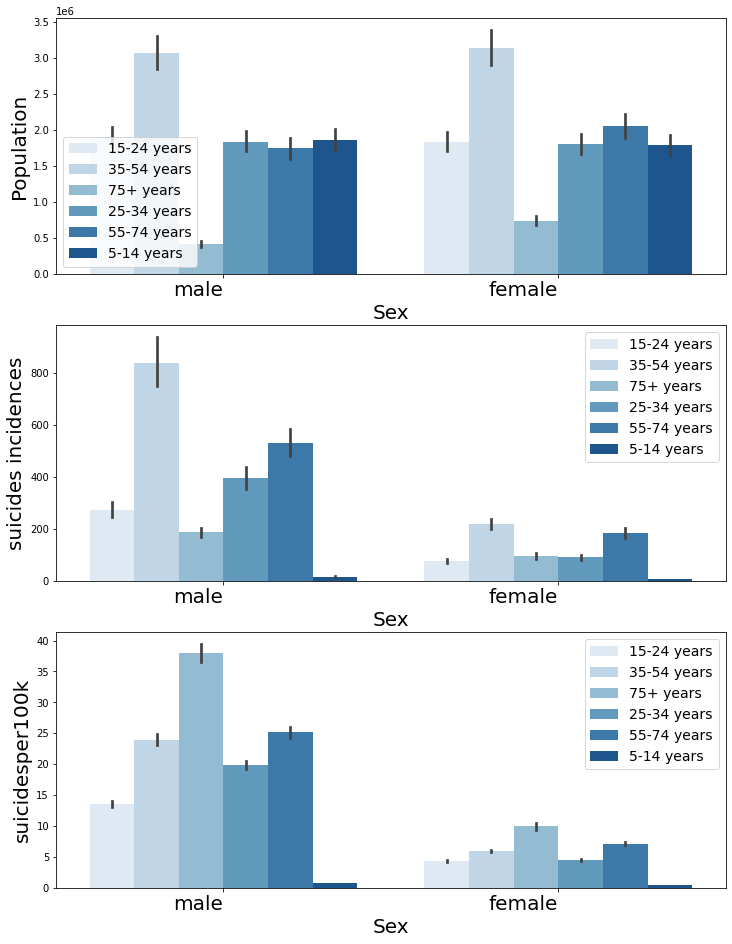

In [18]:
plt.figure(figsize=(12, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df_copy, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='suicides', hue='age', data=df_copy,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df_copy, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

In [19]:
df_totalcases = pd.DataFrame(df_copy.groupby(['year']).suicides_no.sum())

In [20]:
df_gdp = pd.DataFrame(df_copy.groupby(['year']).gdp_per_capita.mean())
df_gdp

,gdp_per_capita
year,
1985,6091.229167
1986,7126.104167
1987,8712.592593
1988,9983.857143
1989,9725.038462
1990,9806.328125
1991,10132.937500
1992,10506.707692
1993,10553.584615


In [21]:
df_totalcases

,suicides_no
year,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244
1990,193361
1991,198020
1992,211473
1993,221565


In [22]:
df_totalcases= df_totalcases[:-1]

Text(0, 0.5, 'Total number of suicides in the world')

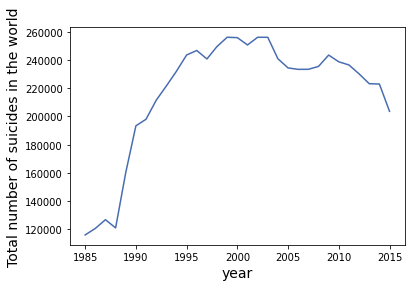

In [23]:
plt.plot(df_totalcases, color=col[18])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

In [24]:
corr = df_copy.corr()

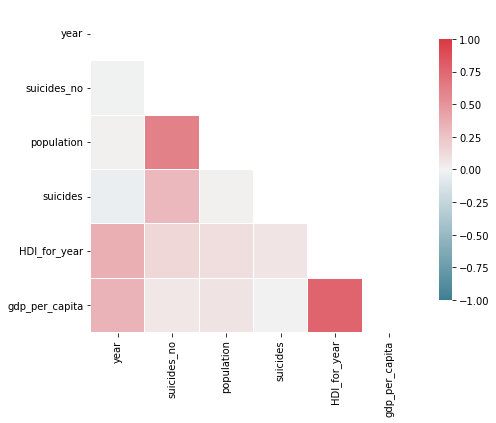

In [25]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

In [26]:
df_copy['risk'] = df_copy.suicides.copy()
df_copy['risk'] = np.where(df_copy.risk < df_copy.suicides.mean(), 0, 1)

In [27]:
df_copy.loc[df_copy['risk'] == 1]

,country,year,sex,age,suicides_no,population,suicides,country-year,HDI_for_year,gdp_for_year ($),gdp_per_capita,generation,risk
96,Albania,1997,male,25-34 years,36,236000,15.25,Albania1997,NaN,"2,359,903,108",793,Generation X,1
97,Albania,1997,male,15-24 years,33,244400,13.50,Albania1997,NaN,"2,359,903,108",793,Generation X,1
156,Albania,2002,male,75+ years,4,31007,12.90,Albania2002,NaN,"4,435,078,648",1573,Silent,1
216,Albania,2007,male,75+ years,8,42366,18.88,Albania2007,NaN,"10,701,011,897",3863,Silent,1
324,Antigua and Barbuda,1990,male,35-54 years,1,5799,17.24,Antigua and Barbuda1990,NaN,"459,469,074",7744,Silent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27736,Uzbekistan,2005,male,35-54 years,362,2712283,13.35,Uzbekistan2005,0.625,"14,307,509,839",606,Boomers,1
27748,Uzbekistan,2009,male,35-54 years,404,3072025,13.15,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers,1
27772,Uzbekistan,2011,male,35-54 years,457,3204569,14.26,Uzbekistan2011,0.661,"45,915,191,189",1767,Generation X,1
27796,Uzbekistan,2013,male,35-54 years,481,3346411,14.37,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation X,1


In [28]:
# Label encoding countries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy.country = le.fit_transform(df_copy.country)  # Alphabetic order [0:40]
df_copy.country.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


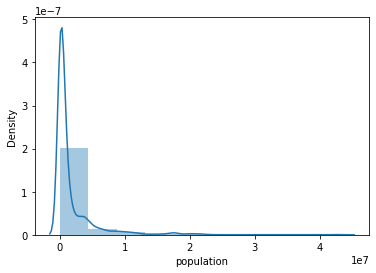

In [29]:
# df_copy.population.plot(kind='hist')
# plt.plot(df_copy.population, norm.df_copy.population)
sns.distplot(df_copy.population, bins=10)

In [30]:
scaler = StandardScaler()
features = ['population']
pop = np.asarray(df_copy[features])
X_scaled_population = scaler.fit_transform(pop)
X_scaled_population

array([[-0.39161747],
       [-0.39287011],
       [-0.39754838],
       ...,
       [ 0.23451753],
       [ 0.20114133],
       [-0.1037548 ]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


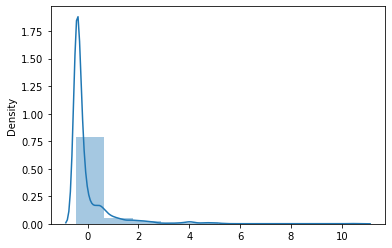

In [31]:
sns.distplot(X_scaled_population, bins=10)

In [32]:
# Using minMax Scalar,
from sklearn.preprocessing import MinMaxScaler
scalerMinMax = MinMaxScaler()
X_scaled_populationMM = scalerMinMax.fit_transform(pop)
X_scaled_populationMM

array([[0.00713668],
       [0.00702482],
       [0.00660706],
       ...,
       [0.06304952],
       [0.06006908],
       [0.03284235]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


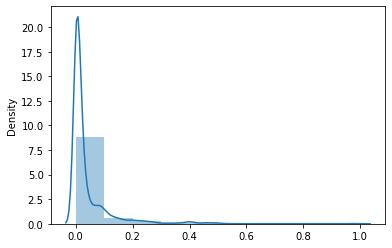

In [33]:
sns.distplot(X_scaled_populationMM, bins=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


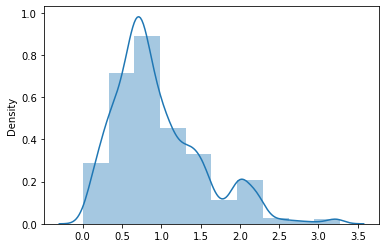

In [34]:
sns.distplot(X_scaled_population**(1/2), bins=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


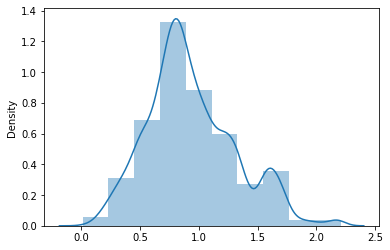

In [35]:
sns.distplot(X_scaled_population**(1/3), bins=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


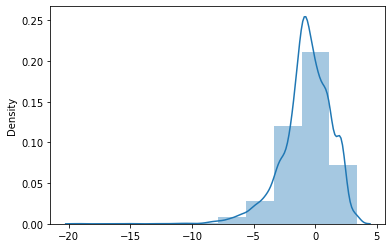

In [36]:
sns.distplot(np.log2(X_scaled_population), bins=10)

In [37]:
df_copy['population'] = df_copy['population']**(1/3)

In [38]:
df_copy

,country,year,sex,age,suicides_no,population,suicides,country-year,HDI_for_year,gdp_for_year ($),gdp_per_capita,generation,risk
0,0,1987,male,15-24 years,21,67.889382,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0
1,0,1987,male,35-54 years,16,67.533134,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0
2,0,1987,female,15-24 years,14,66.168227,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0
3,0,1987,male,75+ years,1,27.935224,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0
4,0,1987,male,25-34 years,9,64.974349,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,female,35-54 years,107,153.556957,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,0
27816,100,2014,female,75+ years,9,70.369812,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,0
27817,100,2014,male,5-14 years,60,140.308131,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0
27818,100,2014,female,5-14 years,44,138.061724,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


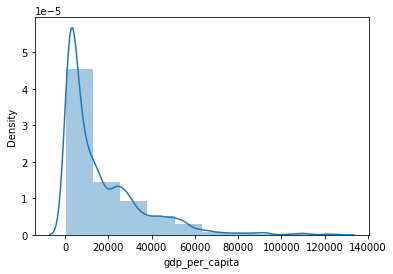

In [39]:
sns.distplot(df_copy.gdp_per_capita, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


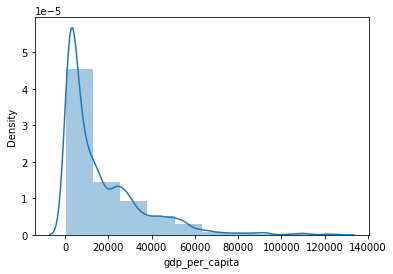

In [40]:
sns.distplot(df_copy.gdp_per_capita, bins=10)

In [41]:
scaler = StandardScaler()
features = ['gdp_per_capita']
cap = np.asarray(df_copy[features])
X_scaled_gdpPerCapita = scaler.fit_transform(cap)
X_scaled_gdpPerCapita

array([[-0.8508637],
       [-0.8508637],
       [-0.8508637],
       ...,
       [-0.7707567],
       [-0.7707567],
       [-0.7707567]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg,

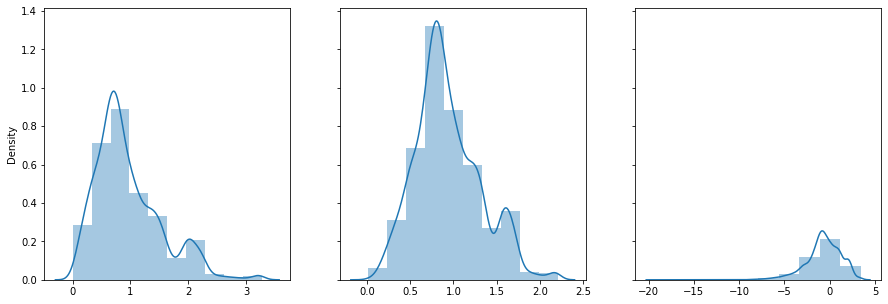

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.distplot(ax=axes[0], x=X_scaled_population**(1/2), bins=10)
sns.distplot(ax=axes[1], x=X_scaled_population**(1/3), bins=10)
sns.distplot(ax=axes[2], x=np.log2(X_scaled_population), bins=10)

In [43]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [44]:
df_scaled = df_copy.copy()

In [45]:
df_scaled['Population_Scaled'] = X_scaled_population

In [46]:
df_scaled['gdp_per_capita_Scaled'] = X_scaled_gdpPerCapita

In [47]:
feature1 = ['X_scaled_population',	'X_scaled_gdpPerCapita']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg,

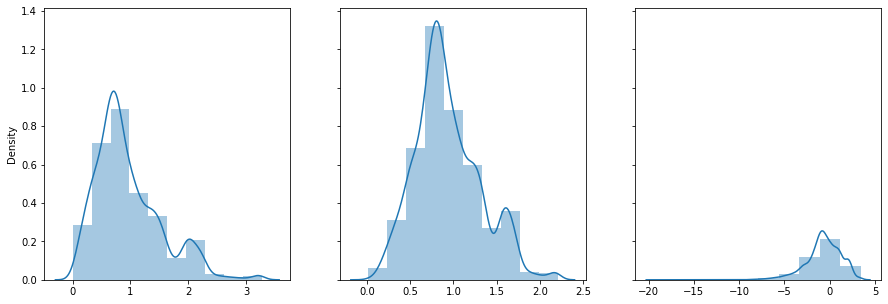

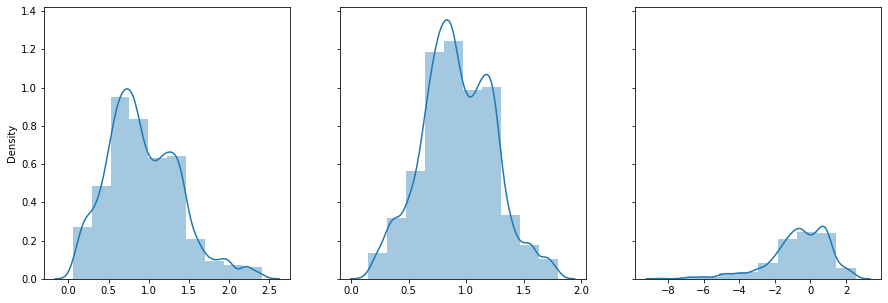

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.distplot(ax=axes[0], x=X_scaled_population**(1/2), bins=10)
sns.distplot(ax=axes[1], x=X_scaled_population**(1/3), bins=10)
sns.distplot(ax=axes[2], x=np.log2(X_scaled_population), bins=10)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.distplot(ax=axes[0], x=X_scaled_gdpPerCapita**(1/2), bins=10)
sns.distplot(ax=axes[1], x=X_scaled_gdpPerCapita**(1/3), bins=10)
sns.distplot(ax=axes[2], x=np.log2(X_scaled_gdpPerCapita), bins=10)

In [49]:
df_scaled['population'] = df_scaled['population']**1/3

In [50]:
df_scaled = df_scaled.rename(columns={"gdp_per_capita ($)": "gdp_per_capita"})

In [51]:
df_scaled = df_scaled.drop(['population', 'gdp_per_capita'], axis=1)

In [52]:
df_scaled

,country,year,sex,age,suicides_no,suicides,country-year,HDI_for_year,gdp_for_year ($),generation,risk,Population_Scaled,gdp_per_capita_Scaled
0,0,1987,male,15-24 years,21,6.71,Albania1987,NaN,"2,156,624,900",Generation X,0,-0.391617,-0.850864
1,0,1987,male,35-54 years,16,5.19,Albania1987,NaN,"2,156,624,900",Silent,0,-0.392870,-0.850864
2,0,1987,female,15-24 years,14,4.83,Albania1987,NaN,"2,156,624,900",Generation X,0,-0.397548,-0.850864
3,0,1987,male,75+ years,1,4.59,Albania1987,NaN,"2,156,624,900",G.I. Generation,0,-0.466035,-0.850864
4,0,1987,male,25-34 years,9,3.28,Albania1987,NaN,"2,156,624,900",Boomers,0,-0.401485,-0.850864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,female,35-54 years,107,2.96,Uzbekistan2014,0.675,"63,067,077,179",Generation X,0,0.454032,-0.770757
27816,100,2014,female,75+ years,9,2.58,Uzbekistan2014,0.675,"63,067,077,179",Silent,0,-0.382526,-0.770757
27817,100,2014,male,5-14 years,60,2.17,Uzbekistan2014,0.675,"63,067,077,179",Generation Z,0,0.234518,-0.770757
27818,100,2014,female,5-14 years,44,1.67,Uzbekistan2014,0.675,"63,067,077,179",Generation Z,0,0.201141,-0.770757
